# Bioinformatics Assignment 2 - Part 3

Bengü Barış Balkan

In [1]:
import pandas as pd
import numpy as np

I've defined state class for training.

In [2]:
class state:
    def __init__(self, type):
        self.structure_type = type
        self.transitions = dict()
        self.emissions = {'A':0, 'R':0, 'N':0, 'D':0, 'C':0,
                          'E':0, 'Q':0, 'G':0, 'H':0, 'I':0,
                          'L':0, 'K':0, 'M':0, 'F':0, 'P':0,
                          'S':0, 'T':0, 'W':0, 'Y':0, 'V':0,}
    
    def set_transition_targets(self, targets):
        for target in targets:
            self.transitions[target] = 0
    

I've created 4 main states along with start and end states.

In [3]:
start = state('start')

Helix = state('Helix')
Strand = state('Strand')
Turn = state('Turn')
Unknown = state('Unknown')

end = state('end')

In [4]:
start.set_transition_targets(['Helix', 'Strand', 'Turn', 'Unknown'])

Helix.set_transition_targets(['Helix', 'Strand', 'Turn', 'Unknown', 'end'])

Strand.set_transition_targets(['Helix', 'Strand', 'Turn', 'Unknown', 'end'])

Turn.set_transition_targets(['Helix', 'Strand', 'Turn', 'Unknown', 'end'])

Unknown.set_transition_targets(['Helix', 'Strand', 'Turn', 'Unknown', 'end'])

## Train

To be able to train on given dataset, I've created a sequence class. So I could convert every training instance to created sequence class.

In [5]:
class sequence:
    def __init__(self, seq):
        self.sequence = seq
        self.helix = []
        self.strand = []
        self.turn = []

In [6]:
df = pd.read_csv('BBM411-AIN411_Assignment2_Q3_TrainingDataset.tsv', sep='\t')

In [7]:
df.drop(columns=['Entry', 'Entry Name'], inplace= True)

In [8]:
df.iloc[4]['Helix']

'HELIX 17..20; HELIX 23..25; HELIX 35..49; HELIX 51..56; HELIX 65..88; HELIX 108..126; HELIX 129..136; HELIX 140..142; HELIX 145..164; HELIX 168..171; HELIX 172..192; HELIX 195..198; HELIX 204..227; HELIX 237..260;'

In [9]:
df

,Sequence,Helix,Beta strand,Turn
0,MTAEDSTAAMSSDSAAGSSAKVPEGVAGAPNEAALLALMERTGYSM...,HELIX 164..174; HELIX 204..211;,STRAND 150..156; STRAND 178..182; STRAND 185.....,TURN 189..193; TURN 212..216; TURN 237..239;
1,MEGSEPVAAHQGEEASCSSWGTGSTNKNLPIMSTASVEIDDALYSR...,HELIX 45..51; HELIX 53..59; HELIX 71..83; HELI...,STRAND 42..44; STRAND 63..67; STRAND 86..91; S...,TURN 483..485; TURN 506..508; TURN 550..552; T...
2,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...,HELIX 196..219; HELIX 221..226; HELIX 230..232...,STRAND 235..241; STRAND 248..255; STRAND 264.....,TURN 283..286; TURN 341..345; TURN 405..407; T...
3,MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,HELIX 83..86; HELIX 90..96; HELIX 112..116; HE...,STRAND 79..81;,TURN 117..119;
4,MAFSDLTSRTVHLYDNWIKDADPRVEDWLLMSSPLPQTILLGFYVY...,HELIX 17..20; HELIX 23..25; HELIX 35..49; HELI...,STRAND 97..99;,TURN 89..94;
...,...,...,...,...
5385,MAETSEEVAVLVQRVVKDITNAFRRNPHIDEIGLIPCPEARYNRSP...,HELIX 7..25; HELIX 58..60; HELIX 61..76; HELIX...,STRAND 31..35; STRAND 42..44; STRAND 46..50; S...,TURN 150..153; TURN 281..283; TURN 284..286;
5386,MQDPNEDTEWNDILRDFGILPPKEESKDEIEEMVLRLQKEAMVKPF...,HELIX 97..99; HELIX 100..103; HELIX 123..138; ...,STRAND 112..118; STRAND 142..148; STRAND 162.....,TURN 104..106; TURN 179..183; TURN 198..200;
5387,MDAFQGILKFFLNQKTVIGYSFMALLTVGSERLFSVVAFKCPCSTE...,HELIX 3..7; HELIX 10..13; HELIX 15..37; HELIX ...,STRAND 43..45; STRAND 142..145; STRAND 150..15...,TURN 156..158; TURN 165..167;
5388,MRRTRRPRFVLMNKMDDLNLHYRFLNWRRRIREIREVRAFRYQERF...,HELIX 151..154;,STRAND 46..52; STRAND 55..58; STRAND 66..69; S...,TURN 89..91; TURN 120..122;


In [10]:
len(df)

5390

I've converted every instance in the data into sequence class I've created.

In [11]:
train_data = []

for i in range(len(df)):
    sample = df.iloc[i]

    seq = sequence(sample['Sequence'])

    for h in sample['Helix'].split(';'):
        if 'HELIX' in h:
            positions = [int(x) for x in h.split()[1].split('..')]
            for i in range(positions[0], positions[1]+1):
                seq.helix.append(i)

    for s in sample['Beta strand'].split(';'):
        if 'STRAND' in s:
            positions = [int(x) for x in s.split()[1].split('..')]
            for i in range(positions[0], positions[1]+1):
                seq.strand.append(i)

    for t in sample['Turn'].split(';'):
        if 'TURN' in t:
            positions = [int(x) for x in t.split()[1].split('..')]
            for i in range(positions[0], positions[1]+1):
                seq.turn.append(i)

    train_data.append(seq)

In [12]:
len(train_data)

5390

I've created a train function to use on every sequence. It basically iterates over the given sequence and adds one to the respective state according to sequence.

In [13]:
def train(seq):
    i = 0
    curr = 'Start'

    # updates the start state
    if i in seq.helix:
        start.transitions['Helix'] += 1
        curr = 'Helix'
        Helix.emissions[seq.sequence[i]] += 1

    elif i in seq.strand:
        start.transitions['Strand'] += 1
        curr = 'Strand'
        Strand.emissions[seq.sequence[i]] += 1

    elif i in seq.turn:
        start.transitions['Turn'] += 1
        curr = 'Turn'
        Turn.emissions[seq.sequence[i]] += 1

    else:
        start.transitions['Unknown'] += 1
        curr = 'Unkown'
        Unknown.emissions[seq.sequence[i]] += 1
    
    i += 1

    # updates the four main states
    while (i < (len(seq.sequence) -1)):
        
        if curr == 'Helix':
            if i in seq.helix:
                Helix.transitions['Helix'] += 1
                curr = 'Helix'
                Helix.emissions[seq.sequence[i]] += 1

            elif i in seq.strand:
                Helix.transitions['Strand'] += 1
                curr = 'Strand'
                Strand.emissions[seq.sequence[i]] += 1

            elif i in seq.turn:
                Helix.transitions['Turn'] += 1
                curr = 'Turn'
                Turn.emissions[seq.sequence[i]] += 1

            else:
                Helix.transitions['Unknown'] += 1
                curr = 'Unkown'
                Unknown.emissions[seq.sequence[i]] += 1


        elif curr == 'Strand':
            if i in seq.helix:
                Strand.transitions['Helix'] += 1
                curr = 'Helix'
                Helix.emissions[seq.sequence[i]] += 1

            elif i in seq.strand:
                Strand.transitions['Strand'] += 1
                curr = 'Strand'
                Strand.emissions[seq.sequence[i]] += 1

            elif i in seq.turn:
                Strand.transitions['Turn'] += 1
                curr = 'Turn'
                Turn.emissions[seq.sequence[i]] += 1

            else:
                Strand.transitions['Unknown'] += 1
                curr = 'Unkown'
                Unknown.emissions[seq.sequence[i]] += 1       


        elif curr== 'Turn':
            if i in seq.helix:
                Turn.transitions['Helix'] += 1
                curr = 'Helix'
                Helix.emissions[seq.sequence[i]] += 1

            elif i in seq.strand:
                Turn.transitions['Strand'] += 1
                curr = 'Strand'
                Strand.emissions[seq.sequence[i]] += 1

            elif i in seq.turn:
                Turn.transitions['Turn'] += 1
                curr = 'Turn'
                Turn.emissions[seq.sequence[i]] += 1

            else:
                Turn.transitions['Unknown'] += 1
                curr = 'Unkown'
                Unknown.emissions[seq.sequence[i]] += 1


        elif curr == 'Unkown':
            if i in seq.helix:
                Unknown.transitions['Helix'] += 1
                curr = 'Helix'
                Helix.emissions[seq.sequence[i]] += 1

            elif i in seq.strand:
                Unknown.transitions['Strand'] += 1
                curr = 'Strand'
                Strand.emissions[seq.sequence[i]] += 1

            elif i in seq.turn:
                Unknown.transitions['Turn'] += 1
                curr = 'Turn'
                Turn.emissions[seq.sequence[i]] += 1

            else:
                Unknown.transitions['Unknown'] += 1
                curr = 'Unkown'
                Unknown.emissions[seq.sequence[i]] += 1
                
        i+=1    

    # updates the four main states' end transitions
    if i in seq.helix:
        Helix.transitions['end'] += 1
        curr = 'end'
        Helix.emissions[seq.sequence[i]] += 1

    elif i in seq.strand:
        Strand.transitions['end'] += 1
        curr = 'end'
        Strand.emissions[seq.sequence[i]] += 1

    elif i in seq.turn:
        Turn.transitions['end'] += 1
        curr = 'end'
        Turn.emissions[seq.sequence[i]] += 1

    else:
        Unknown.transitions['end'] += 1
        curr = 'end'
        Unknown.emissions[seq.sequence[i]] += 1

In [14]:
for train_in in train_data:
    try:
        train(train_in)
    
    # some proteins contain amino acid U, which cause an exception
    except Exception as e:
        print(e)

'U'
'U'
'U'
'U'
'U'
'U'
'U'


## Transition values

Every start transition goes to the unknown state. To prevent bias, I've added pseudo-counts.

In [15]:
start.transitions

{'Helix': 0, 'Strand': 0, 'Turn': 0, 'Unknown': 5390}

In [16]:
# pseudo-counts
for key, value in start.transitions.items():
    start.transitions[key] = value + 1

In [17]:
start.transitions

{'Helix': 1, 'Strand': 1, 'Turn': 1, 'Unknown': 5391}

In [18]:
print(f"Helix transitions:\t{Helix.transitions}")
print(f"Strand transitions:\t{Strand.transitions}")
print(f"Turn transitions:\t{Turn.transitions}")
print(f"Unknown transitions:\t{Unknown.transitions}")

Helix transitions:	{'Helix': 635943, 'Strand': 4573, 'Turn': 5463, 'Unknown': 59465, 'end': 135}
Strand transitions:	{'Helix': 5964, 'Strand': 359928, 'Turn': 4018, 'Unknown': 66368, 'end': 275}
Turn transitions:	{'Helix': 2381, 'Strand': 3970, 'Turn': 52343, 'Unknown': 14271, 'end': 56}
Unknown transitions:	{'Helix': 61469, 'Strand': 68265, 'Turn': 11228, 'Unknown': 2097618, 'end': 4917}


In [19]:
start_transition_sum = sum(start.transitions.values())
for key, value in start.transitions.items():
    start.transitions[key] = value / start_transition_sum

helix_transition_sum = sum(Helix.transitions.values())
for key, value in Helix.transitions.items():
    Helix.transitions[key] = value / helix_transition_sum

strand_transition_sum = sum(Strand.transitions.values())
for key, value in Strand.transitions.items():
    Strand.transitions[key] = value / strand_transition_sum

turn_transition_sum = sum(Turn.transitions.values())
for key, value in Turn.transitions.items():
    Turn.transitions[key] = value / turn_transition_sum

unknown_transition_sum = sum(Unknown.transitions.values())
for key, value in Unknown.transitions.items():
    Unknown.transitions[key] = value / unknown_transition_sum

In [20]:
print(f"start transitions: \n{start.transitions}\n")
print(f"Helix transitions: \n{Helix.transitions}\n")
print(f"Strand transitions: \n{Strand.transitions}\n")
print(f"Turn transitions: \n{Turn.transitions}\n")
print(f"Unknown transitions: \n{Unknown.transitions}\n")

start transitions: 
{'Helix': 0.0001853911753800519, 'Strand': 0.0001853911753800519, 'Turn': 0.0001853911753800519, 'Unknown': 0.9994438264738599}

Helix transitions: 
{'Helix': 0.9013065865055507, 'Strand': 0.006481201963210356, 'Turn': 0.007742577372625886, 'Unknown': 0.08427830193358929, 'end': 0.00019133222502370394}

Strand transitions: 
{'Helix': 0.013661571447224049, 'Strand': 0.8244772112435375, 'Turn': 0.009203922547777703, 'Unknown': 0.15202735979365622, 'end': 0.0006299349678045965}

Turn transitions: 
{'Helix': 0.03260705824351899, 'Strand': 0.05436792155681242, 'Turn': 0.7168211884252476, 'Unknown': 0.19543692910258692, 'end': 0.0007669026718341299}

Unknown transitions: 
{'Helix': 0.027398744014366858, 'Strand': 0.030427943518533788, 'Turn': 0.0050046868794564915, 'Unknown': 0.9349769578475032, 'end': 0.0021916677401396124}



I've first tried initial transition rates but the prediction became all unknown. So I've changed transition rates.

In [21]:
start.transitions['Helix']  = 0.25
start.transitions['Strand'] = 0.25
start.transitions['Turn']   = 0.25
start.transitions['Unknown']= 0.25

In [22]:
Helix.transitions['Helix']  = 0.40
Helix.transitions['Strand'] = 0.20
Helix.transitions['Turn']   = 0.20
Helix.transitions['Unknown']= 0.20

In [23]:
Strand.transitions['Helix']  = 0.20
Strand.transitions['Strand'] = 0.40
Strand.transitions['Turn']   = 0.20
Strand.transitions['Unknown']= 0.20

In [24]:
Turn.transitions['Helix']  = 0.20
Turn.transitions['Strand'] = 0.20
Turn.transitions['Turn']   = 0.40
Turn.transitions['Unknown']= 0.20

In [25]:
Unknown.transitions['Helix']  = 0.20
Unknown.transitions['Strand'] = 0.20
Unknown.transitions['Turn']   = 0.20
Unknown.transitions['Unknown']= 0.40

In [26]:
print(f"Helix transitions: \n{Helix.transitions}\n")
print(f"Strand transitions: \n{Strand.transitions}\n")
print(f"Turn transitions: \n{Turn.transitions}\n")
print(f"Unknown transitions: \n{Unknown.transitions}\n")

Helix transitions: 
{'Helix': 0.4, 'Strand': 0.2, 'Turn': 0.2, 'Unknown': 0.2, 'end': 0.00019133222502370394}

Strand transitions: 
{'Helix': 0.2, 'Strand': 0.4, 'Turn': 0.2, 'Unknown': 0.2, 'end': 0.0006299349678045965}

Turn transitions: 
{'Helix': 0.2, 'Strand': 0.2, 'Turn': 0.4, 'Unknown': 0.2, 'end': 0.0007669026718341299}

Unknown transitions: 
{'Helix': 0.2, 'Strand': 0.2, 'Turn': 0.2, 'Unknown': 0.4, 'end': 0.0021916677401396124}



## Emission values

In [27]:
print(f"Helix emissions: \n{Helix.emissions}\n")
print(f"Strand emissions: \n{Strand.emissions}\n")
print(f"Turn emissions: \n{Turn.emissions}\n")
print(f"Unknown emissions: \n{Unknown.emissions}\n")

Helix emissions: 
{'A': 60752, 'R': 42002, 'N': 24445, 'D': 30238, 'C': 14735, 'E': 56292, 'Q': 37470, 'G': 26954, 'H': 17844, 'I': 42646, 'L': 96187, 'K': 45309, 'M': 21091, 'F': 34436, 'P': 7250, 'S': 38755, 'T': 29318, 'W': 10264, 'Y': 24714, 'V': 45190}

Strand emissions: 
{'A': 23394, 'R': 20290, 'N': 15641, 'D': 20145, 'C': 12891, 'E': 22667, 'Q': 14350, 'G': 27353, 'H': 11577, 'I': 30690, 'L': 44154, 'K': 21782, 'M': 8783, 'F': 23162, 'P': 15300, 'S': 27561, 'T': 26272, 'W': 7264, 'Y': 18786, 'V': 44945}

Turn emissions: 
{'A': 3960, 'R': 4200, 'N': 4149, 'D': 4659, 'C': 2300, 'E': 5063, 'Q': 3298, 'G': 8505, 'H': 2175, 'I': 2516, 'L': 5601, 'K': 4994, 'M': 1450, 'F': 3137, 'P': 1226, 'S': 4982, 'T': 4296, 'W': 953, 'Y': 2514, 'V': 3130}

Unknown emissions: 
{'A': 148653, 'R': 124103, 'N': 89008, 'D': 122521, 'C': 43647, 'E': 164565, 'Q': 105896, 'G': 163114, 'H': 54622, 'I': 84220, 'L': 187884, 'K': 134331, 'M': 45057, 'F': 66747, 'P': 186586, 'S': 203850, 'T': 126924, 'W': 232

In [28]:
helix_emission_sum = sum(Helix.emissions.values())
for key, value in Helix.emissions.items():
    Helix.emissions[key] = value / helix_emission_sum

strand_emission_sum = sum(Strand.emissions.values())
for key, value in Strand.emissions.items():
    Strand.emissions[key] = value / strand_emission_sum

turn_emission_sum = sum(Turn.emissions.values())
for key, value in Turn.emissions.items():
    Turn.emissions[key] = value / turn_emission_sum

unknown_emission_sum = sum(Unknown.emissions.values())
for key, value in Unknown.emissions.items():
    Unknown.emissions[key] = value / unknown_emission_sum

In [29]:
print(f"Helix emissions: \n{Helix.emissions}\n")
print(f"Strand emissions: \n{Strand.emissions}\n")
print(f"Turn emissions: \n{Turn.emissions}\n")
print(f"Unknown emissions: \n{Unknown.emissions}\n")

Helix emissions: 
{'A': 0.08606415712318598, 'R': 0.0595020201390581, 'N': 0.03462994339077366, 'D': 0.04283658123338981, 'C': 0.020874298051259964, 'E': 0.07974591013922809, 'Q': 0.05308177454908116, 'G': 0.03818431148107643, 'H': 0.025278654525054824, 'I': 0.06041434100400628, 'L': 0.13626305440492315, 'K': 0.06418687277940535, 'M': 0.029878508327052862, 'F': 0.04878366662322282, 'P': 0.010270692967196115, 'S': 0.05490216633706006, 'T': 0.04153326571203527, 'W': 0.014540467946938059, 'Y': 0.035011021516039284, 'V': 0.06401829175001275}

Strand emissions: 
{'A': 0.05353232328086278, 'R': 0.046429462228293826, 'N': 0.03579118869949452, 'D': 0.04609765976288709, 'C': 0.029498383321090966, 'E': 0.05186873436809937, 'Q': 0.03283700261094216, 'G': 0.06259167473289902, 'H': 0.026491566496646506, 'I': 0.07022770802298361, 'L': 0.10103728315564739, 'K': 0.049843595182685864, 'M': 0.0200980762321885, 'F': 0.05300143933621201, 'P': 0.03501088083257248, 'S': 0.0630676396487928, 'T': 0.0601180301

# Viterbi algorithm

I've implemented viterbi algorithm to see the most probable path and its probability

In [30]:
prot_seq = 'MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP'

In [31]:
print(len(prot_seq))

179


Here is the viterbi implementation. I've used a 4*179 dp array. I've created every row in a different list to have better understanding on the algorithm. 

I've initialized the first values in every row since they require start state's transition values, then proceed with the algoritm.

In [32]:
helix_prob_list = []
strand_prob_list = []
turn_prob_list = []
unk_prob_list = []

In [33]:
helix_prob_list.append(np.log2(start.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[0]]))
strand_prob_list.append(np.log2(start.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[0]]))
turn_prob_list.append(np.log2(start.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[0]]))
unk_prob_list.append(np.log2(start.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[0]]))

In [34]:
print(helix_prob_list)
print(strand_prob_list)
print(turn_prob_list)
print(unk_prob_list)

[-7.064748065840419]
[-7.636798775092261]
[-7.655904479468149]
[-7.6407636524365925]


In [35]:
for i in range(1, len(prot_seq)):
    helix_prob_list.append(max(
        helix_prob_list[i-1]    + np.log2(Helix.transitions['Helix'])   + np.log2(Helix.emissions[prot_seq[i]]),
        strand_prob_list[i-1]   + np.log2(Strand.transitions['Helix'])  + np.log2(Helix.emissions[prot_seq[i]]),
        turn_prob_list[i-1]     + np.log2(Turn.transitions['Helix'])    + np.log2(Helix.emissions[prot_seq[i]]),
        unk_prob_list[i-1]      + np.log2(Unknown.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[i]])
    ))

    strand_prob_list.append(max(
        helix_prob_list[i-1]    + np.log2(Helix.transitions['Strand'])   + np.log2(Strand.emissions[prot_seq[i]]),
        strand_prob_list[i-1]   + np.log2(Strand.transitions['Strand'])  + np.log2(Strand.emissions[prot_seq[i]]),
        turn_prob_list[i-1]     + np.log2(Turn.transitions['Strand'])    + np.log2(Strand.emissions[prot_seq[i]]),
        unk_prob_list[i-1]      + np.log2(Unknown.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[i]])
    ))

    turn_prob_list.append(max(
        helix_prob_list[i-1]    + np.log2(Helix.transitions['Turn'])   + np.log2(Turn.emissions[prot_seq[i]]),
        strand_prob_list[i-1]   + np.log2(Strand.transitions['Turn'])  + np.log2(Turn.emissions[prot_seq[i]]),
        turn_prob_list[i-1]     + np.log2(Turn.transitions['Turn'])    + np.log2(Turn.emissions[prot_seq[i]]),
        unk_prob_list[i-1]      + np.log2(Unknown.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[i]])
    ))

    unk_prob_list.append(max(
        helix_prob_list[i-1]    + np.log2(Helix.transitions['Unknown'])   + np.log2(Unknown.emissions[prot_seq[i]]),
        strand_prob_list[i-1]   + np.log2(Strand.transitions['Unknown'])  + np.log2(Unknown.emissions[prot_seq[i]]),
        turn_prob_list[i-1]     + np.log2(Turn.transitions['Unknown'])    + np.log2(Unknown.emissions[prot_seq[i]]),
        unk_prob_list[i-1]      + np.log2(Unknown.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[i]])
    ))



In [36]:
print(helix_prob_list)
print(strand_prob_list)
print(turn_prob_list)
print(unk_prob_list)

[-7.064748065840419, -11.925119822601179, -17.434041030854793, -22.991608714018163, -29.16537296950251, -34.55821860431332, -40.425159545078856, -48.352410305669046, -51.170220461211436, -56.03059221797219, -61.942109188990365, -67.45103039724398, -72.33183844499375, -77.19221020175452, -82.05258195851529, -86.91295371527606, -92.30579935008687, -97.58930536096118, -103.62210963556899, -108.48248139232976, -113.45285514649248, -121.38010590708268, -125.0449819864167, -130.35387200715618, -135.46050630514853, -139.03258796672327, -143.89295972348404, -149.28580535829485, -155.31860963290268, -163.02530744454577, -165.82305448522476, -171.85585875983259, -176.45428639916517, -181.84713203397598, -186.04459377277445, -191.60216145593782, -197.1597291391012, -202.1301028932639, -206.32756463206238, -212.71424079279018, -218.62575776380837, -222.82321950260683, -229.20989566333463, -235.59657182406244, -241.10549303231605, -247.13829730692387, -253.00523824768942, -257.79667767081014, -263.

### Back-propagation for the path

In [37]:
predicted_seq = 'U'

In [38]:
curr = 'Strand'
i = len(prot_seq)-1

while i > 0:
    if curr == 'Helix':
        if helix_prob_list[i] == helix_prob_list[i-1] + np.log2(Helix.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[i]]):
            curr = 'Helix'
            predicted_seq = 'H' + predicted_seq
        
        elif helix_prob_list[i] == strand_prob_list[i-1] + np.log2(Strand.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[i]]):
            curr = 'Strand'
            predicted_seq = 'E' + predicted_seq
        
        elif helix_prob_list[i] == turn_prob_list[i-1] + np.log2(Turn.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[i]]):
            curr = 'Turn'
            predicted_seq = 'T' + predicted_seq
        
        elif helix_prob_list[i] == unk_prob_list[i-1] + np.log2(Unknown.transitions['Helix']) + np.log2(Helix.emissions[prot_seq[i]]):
            curr = 'Unknown'
            predicted_seq = 'U' + predicted_seq
        
        else:
            print('couldnt find equality')


    elif curr == 'Strand':
        if strand_prob_list[i] == helix_prob_list[i-1] + np.log2(Helix.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[i]]):
            curr = 'Helix'
            predicted_seq = 'H' + predicted_seq
        
        elif strand_prob_list[i] == strand_prob_list[i-1] + np.log2(Strand.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[i]]):
            curr = 'Strand'
            predicted_seq = 'E' + predicted_seq

        elif strand_prob_list[i] == turn_prob_list[i-1] + np.log2(Turn.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[i]]):
            curr = 'Turn'
            predicted_seq = 'T' + predicted_seq
        
        elif strand_prob_list[i] == unk_prob_list[i-1] + np.log2(Unknown.transitions['Strand']) + np.log2(Strand.emissions[prot_seq[i]]):
            curr = 'Unknown'
            predicted_seq = 'U' + predicted_seq

        else:
            print('couldnt find equality')

    
    elif curr == 'Turn':
        if turn_prob_list[i] == helix_prob_list[i-1] + np.log2(Helix.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[i]]):
            curr = 'Helix'
            predicted_seq = 'H' + predicted_seq
        
        elif turn_prob_list[i] == strand_prob_list[i-1] + np.log2(Strand.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[i]]):
            curr = 'Strand'
            predicted_seq = 'E' + predicted_seq
        
        elif turn_prob_list[i] == turn_prob_list[i-1] + np.log2(Turn.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[i]]):
            curr = 'Turn'
            predicted_seq = 'T' + predicted_seq
        
        elif turn_prob_list[i] == unk_prob_list[i-1] + np.log2(Unknown.transitions['Turn']) + np.log2(Turn.emissions[prot_seq[i]]):
            curr = 'Unknown'
            predicted_seq = 'U' + predicted_seq
        
        else:
            print('couldnt find equality')
    

    elif curr == 'Unknown':
        if unk_prob_list[i] == helix_prob_list[i-1] + np.log2(Helix.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[i]]):
            curr = 'Helix'
            predicted_seq = 'H' + predicted_seq
        
        elif unk_prob_list[i] == strand_prob_list[i-1] + np.log2(Strand.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[i]]):
            curr = 'Strand'
            predicted_seq = 'E' + predicted_seq
        
        elif unk_prob_list[i] == turn_prob_list[i-1] + np.log2(Turn.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[i]]):
            curr = 'Turn'
            predicted_seq = 'T' + predicted_seq

        elif unk_prob_list[i] == unk_prob_list[i-1] + np.log2(Unknown.transitions['Unknown']) + np.log2(Unknown.emissions[prot_seq[i]]):
            curr = 'Unknown'
            predicted_seq = 'U' + predicted_seq
        
        else:
            print('couldnt find equality')
    
    
    i -=1

In [39]:
predicted_seq

'UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHTTTTTHHHHUUUUUEEEEEEEEEEEEEEEEHHHHHHHHHHHUUUUUUUUUEEEEEEEEEEEEETTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHUUUUUUUUHHHHHHHHHHUUUHHHHHHHHHHHHHEEEEEU'

In [40]:
print(len(predicted_seq))

179


# Results

In [41]:
# probability of the most probable path
print(pow(2,-971.6646453799419))

3.1607927056864507e-293


I've downloaded UBE2C_HUMAN.json file from uniprot to compare with the prediction.

In [42]:
import json
true_seq = 'U' * len(prot_seq)

with open('UBE2C_HUMAN.json', 'r') as file:
    data = json.load(file)

    for feature in data['features']:
        type = feature['type']
        start = feature['location']['start']['value']
        end = feature['location']['end']['value']

        print(type, start, end)

        if type == 'Helix':
            true_seq = list(true_seq)
            for i in range(start, end+1):
                true_seq[i] = 'H'
            true_seq = ''.join(true_seq)

        elif type == 'Beta strand':
            true_seq = list(true_seq)
            for i in range(start, end+1):
                true_seq[i] = 'E'
            true_seq = ''.join(true_seq)

        elif type == 'Turn':
            true_seq = list(true_seq)
            for i in range(start, end+1):
                true_seq[i] = 'T'
            true_seq = ''.join(true_seq)

Helix 30 45
Beta strand 50 54
Beta strand 61 68
Beta strand 78 84
Turn 87 91
Beta strand 95 100
Beta strand 111 113
Helix 116 118
Turn 119 121
Helix 128 140
Helix 150 155
Helix 159 172


In [43]:
true_seq

'UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHHHHHUUUUEEEEEUUUUUUEEEEEEEEUUUUUUUUUEEEEEEEUUTTTTTUUUEEEEEEUUUUUUUUUUEEEUUHHHTTTUUUUUUHHHHHHHHHHHHHUUUUUUUUUHHHHHHUUUHHHHHHHHHHHHHHUUUUUU'

In [44]:
print(true_seq)
print(predicted_seq)

UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHHHHHUUUUEEEEEUUUUUUEEEEEEEEUUUUUUUUUEEEEEEEUUTTTTTUUUEEEEEEUUUUUUUUUUEEEUUHHHTTTUUUUUUHHHHHHHHHHHHHUUUUUUUUUHHHHHHUUUHHHHHHHHHHHHHHUUUUUU
UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHTTTTTHHHHUUUUUEEEEEEEEEEEEEEEEHHHHHHHHHHHUUUUUUUUUEEEEEEEEEEEEETTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHUUUUUUUUHHHHHHHHHHUUUHHHHHHHHHHHHHEEEEEU


## Visualisation

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
real = np.array(list(true_seq))
predicted = np.array(list(predicted_seq))

In [47]:
cm = confusion_matrix(real, predicted)

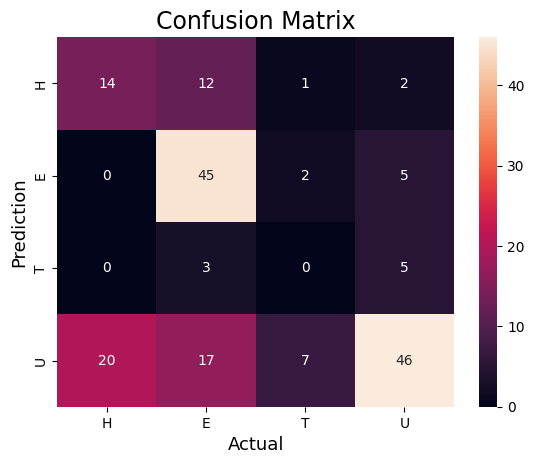

In [48]:
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['H','E','T','U'],
            yticklabels=['H','E','T','U'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [49]:
accuracy_score(real, predicted)

0.5865921787709497

In [50]:
prot_seq

'MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP'

In [51]:
predicted_seq

'UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUHHHHHHHHHHHHTTTTTHHHHUUUUUEEEEEEEEEEEEEEEEHHHHHHHHHHHUUUUUUUUUEEEEEEEEEEEEETTTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHUUUUUUUUHHHHHHHHHHUUUHHHHHHHHHHHHHEEEEEU'

In [52]:
helixes = []
strands = []
turns = []

In [53]:
i = 0
curr = predicted_seq[i]

while i < len(predicted_seq):
    
    start_index = i
    while curr == predicted_seq[i]:
        i += 1
        if i == len(predicted_seq):
            break
    
    if curr == 'H':
        helixes.append((start_index, i-1))
    elif curr == 'E':
        strands.append((start_index, i-1))
    elif curr == 'T':
        turns.append((start_index, i-1))
    
    if i != len(predicted_seq):
        curr = predicted_seq[i]

In [54]:
helixes

[(32, 43), (49, 52), (74, 84), (112, 138), (147, 156), (160, 172)]

In [55]:
strands

[(58, 73), (94, 106), (173, 177)]

In [56]:
turns

[(44, 48), (107, 111)]

In [57]:
formatted_pred = 'O00762\tUBE2C_HUMAN\t' + prot_seq + '\t'
formatted_helix = ''
formatted_strand = ''
formatted_turn = ''

In [58]:
for s,e in helixes:
    formatted_helix += f"HELIX {s}..{e}; "

for s,e in strands:
    formatted_strand += f"STRAND {s}..{e}; "

for s,e in turns:
    formatted_turn += f"TURN {s}..{e}; "

In [59]:
formatted_helix

'HELIX 32..43; HELIX 49..52; HELIX 74..84; HELIX 112..138; HELIX 147..156; HELIX 160..172; '

In [60]:
formatted_turn

'TURN 44..48; TURN 107..111; '

In [61]:
formatted_pred += formatted_helix.strip() + '\t' + formatted_strand.strip() + '\t' + formatted_turn.strip()

In [62]:
formatted_pred

'O00762\tUBE2C_HUMAN\tMASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP\tHELIX 32..43; HELIX 49..52; HELIX 74..84; HELIX 112..138; HELIX 147..156; HELIX 160..172;\tSTRAND 58..73; STRAND 94..106; STRAND 173..177;\tTURN 44..48; TURN 107..111;'

In [63]:
formatted_pred.split('\t')

['O00762',
 'UBE2C_HUMAN',
 'MASQNRDPAATSVAAARKGAEPSGGAARGPVGKRLQQELMTLMMSGDKGISAFPESDNLFKWVGTIHGAAGTVYEDLRYKLSLEFPSGYPYNAPTVKFLTPCYHPNVDTQGNICLDILKEKWSALYDVRTILLSIQSLLGEPNIDSPLNTHAAELWKNPTAFKKYLQETYSKQVTSQEP',
 'HELIX 32..43; HELIX 49..52; HELIX 74..84; HELIX 112..138; HELIX 147..156; HELIX 160..172;',
 'STRAND 58..73; STRAND 94..106; STRAND 173..177;',
 'TURN 44..48; TURN 107..111;']